<a href="https://colab.research.google.com/github/JoaqSM/ML_course-colab-files/blob/main/S07-Linear-Models/Tarea_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Regresion Lineal aplicada a datos de automóviles

En esta tarea usted debe investigar acerca del conjunto de datos [auto mpg](https://seaborn.pydata.org/examples/scatter_bubbles.html) perteneciente a la libreria [seaborn](https://seaborn.pydata.org/)

**Objetivo**: Estimar el rendimiento promedio de automoviles usando regresión lineal

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
auto_mpg = sns.load_dataset('mpg')
auto_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [57]:
auto_mpg.shape

(398, 9)

1) (1 punto) Establecer una visualización de los datos a través de un [Gráfico de dispersión](https://seaborn.pydata.org/tutorial/axis_grids.html)

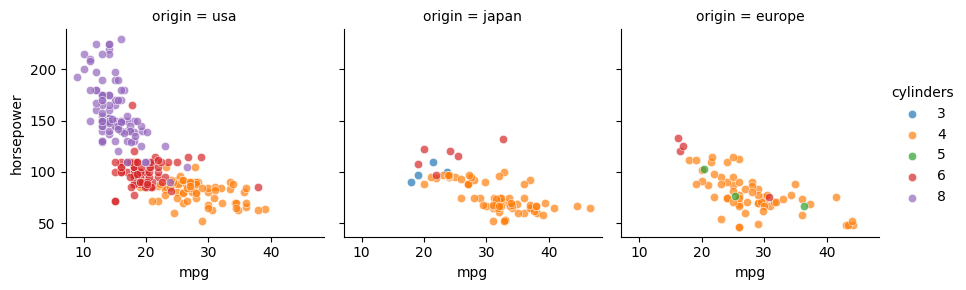

In [58]:
g = sns.FacetGrid(auto_mpg, col="origin", hue="cylinders")
g.map(sns.scatterplot, "mpg", "horsepower", alpha=.7)
g.add_legend()

2) (1 punto) Investigar e incluir un grafico de correlacion ([Correlation Plot](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)) para visualizar la dependencia entre los datos

<ipython-input-59-2ebc20669383>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = auto_mpg.corr()


<Axes: >

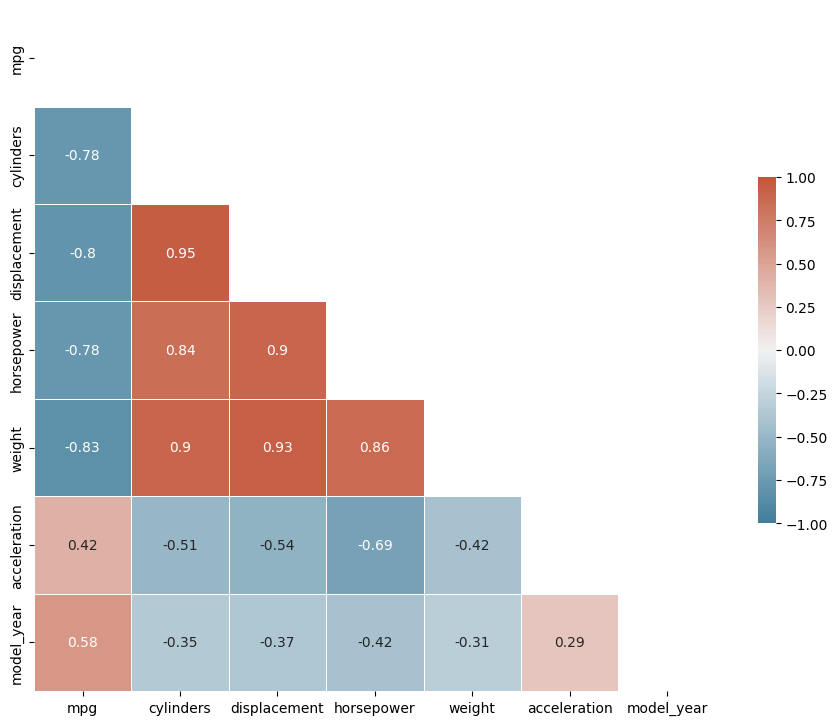

In [59]:
# Compute the correlation matrix
corr = auto_mpg.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

3) (1 punto) Construir y entrenar un modelo de regresion lineal


Preprocesamiento de datos

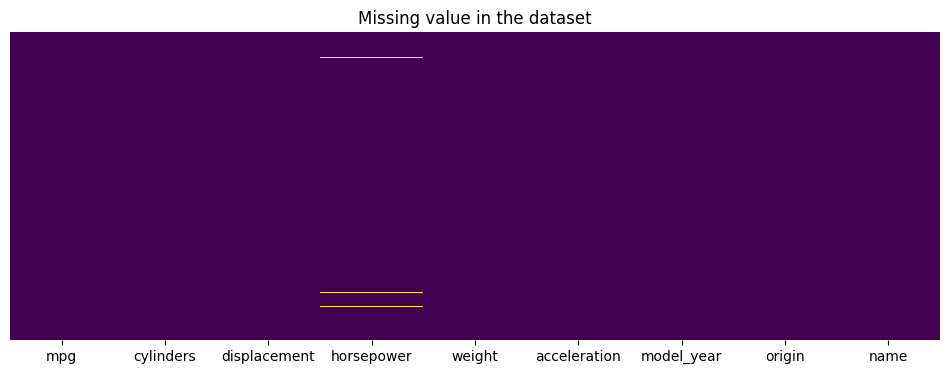

In [60]:
# Revisión de valores faltantes
plt.figure(figsize=(12,4))
sns.heatmap(auto_mpg.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

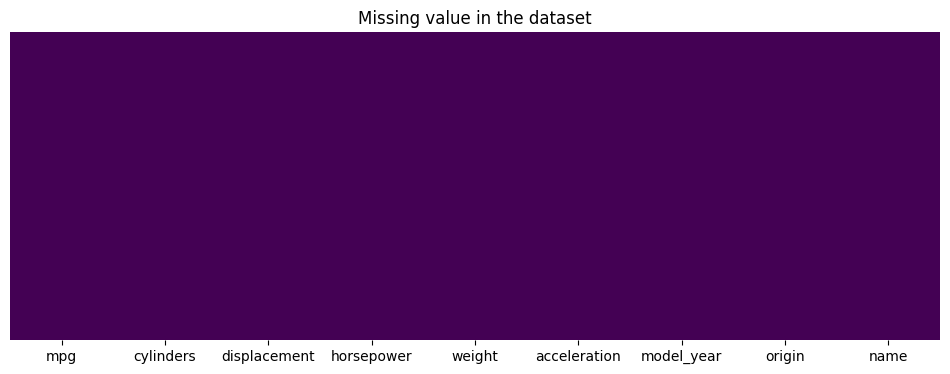

In [61]:
# Eliminar filas con valores faltantes
auto_mpg.dropna(inplace=True)
plt.figure(figsize=(12,4))
sns.heatmap(auto_mpg.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

In [62]:
# One-hot encoding del atributo origin
origin_dummies = pd.get_dummies(auto_mpg.origin)
auto_mpg = pd.concat([auto_mpg, origin_dummies], axis=1)

# Eliminar atributo origin
auto_mpg = auto_mpg.drop('origin',axis=1)

# Eliminar atributo name
auto_mpg = auto_mpg.drop('name',axis=1)

In [63]:
auto_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,europe,japan,usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1


Separación de datos de entrenamiento y de pruebas

In [64]:
from sklearn.model_selection import train_test_split

X = auto_mpg.drop('mpg',axis=1) # Independet variable
y = auto_mpg['mpg'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123)

Modelado

In [65]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

4) (1 punto) Mostrar estadistiscas de desempeño del modelo (investigar)

Obtener predicciones

In [66]:
y_predict = lin_reg.predict(X_test)

Obtener métricas

In [68]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

MAE = mean_absolute_error(y_test, y_predict)
MSE = mean_squared_error(y_test, y_predict)
R2 = r2_score(y_test, y_predict)

print("Mean Absolute Error (0.0 es mejor) = " + str(MAE))
print("Mean Squared Error (0.0 es mejor) = " + str(MSE))
print("R2 Score (1.0 es mejor) = " + str(R2))

Mean Absolute Error (0.0 es mejor) = 2.9892729254681267
Mean Squared Error (0.0 es mejor) = 13.99640246398636
R2 Score (1.0 es mejor) = 0.7547114101858385


5) (1 punto) Mostrar [graficamente la lineas rectas](https://seaborn.pydata.org/tutorial/regression.html) en un grafico de dispersión para el par de variables que presentan la mayor correlacion. esta informacion la obtiene del correlation plot. realizar un grafico de dispersion con las variables mas correlacionadas.


Los atributos que presentan mayor correlación son "displacement" y "cylinders" con 0.95


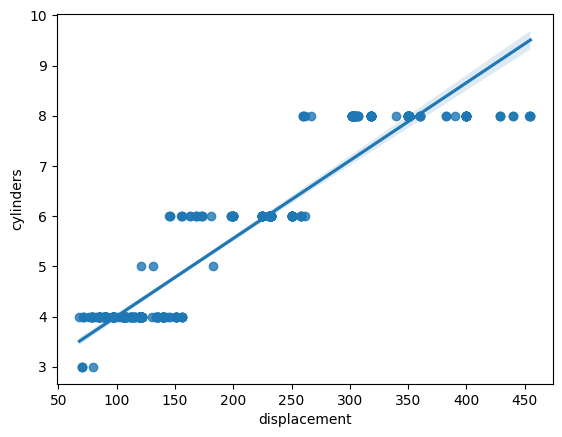

In [70]:
sns.regplot(x="displacement", y="cylinders", data=auto_mpg);

6) (1 punto) [Guardar el Jupyter notebook resultante en su cuenta propia de Github ](https://bebi103a.github.io/lessons/02/git_with_colab.html) y compartir el enlace en la pagina de la tarea en Educandus.